# Tutorial: Putting It All Together: A Scikit-learn Evaluation Workflow

Selamat datang di subchapter terakhir dari Chapter 4! Di sini, kita akan menggabungkan semua yang telah kita pelajari—metrik absolut, metrik relatif, dan analisis visual—ke dalam satu alur kerja evaluasi yang komprehensif.

Tujuan dari notebook ini adalah untuk menunjukkan bagaimana cara menceritakan kisah lengkap tentang performa model Anda, melampaui satu angka saja, untuk memberikan analisis yang mendalam dan dapat ditindaklanjuti.
---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Mengimplementasikan alur kerja evaluasi regresi yang lengkap dari awal hingga akhir.
* Menghitung dan menginterpretasikan berbagai metrik (MAE, MSE, RMSE, R²) secara bersamaan.
* Menggunakan plot residual sebagai bagian integral dari proses evaluasi.
* Mensintesis semua temuan untuk membuat kesimpulan yang kuat tentang kelebihan dan kekurangan model.

In [65]:
# import modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [66]:
# atur tema visual 
sns.set_theme(style='whitegrid', context='talk')

# manual dataset
df = sns.load_dataset('tips')

print(df.head())
print(df.isnull().sum())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [67]:
# ambil data X (fitur) dan Y (target) nya
X = df[['total_bill']]
Y = df[['tip']]

# split train dan test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

# buat model
model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, index=X_test.index, columns=['tip'])

print(Y_pred)

          tip
24   3.045256
6    1.863307
153  3.551195
211  3.694526
198  2.315764
176  2.838816
192  3.967283
124  2.260143
9    2.506159
101  2.570337
45   2.881602
233  2.077235
117  2.064399
177  2.474070
82   2.002360
146  2.919039
200  2.926527
15   3.233512
66   2.684789
142  5.331071
33   3.138315
19   3.134036
109  2.455886
30   1.946739
186  3.160777
120  2.175641
10   2.023753
73   3.629278
159  2.689067
156  6.077677
112  4.997344
218  1.753135
25   2.830259
60   3.095529
18   2.740410
119  3.500922
97   2.212009
197  5.536441
139  2.332878
241  3.350103
75   2.049424
127  2.478349
113  3.487016
16   2.030171
196  2.031240
67   1.253614
168  2.057981
38   2.924387
195  1.733881


### 3. Langkah 1: Hitung Semua Metrik Kuantitatif

Mari kita kumpulkan semua angka performa model kita di satu tempat.

In [68]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

evaluation_metrics = {
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMAE)': rmse,
    'R-Squared (R²)': r2
}

# cetak
print(f'---- Metrik Evaulasi Kuantitatif ----')
for metric, value in evaluation_metrics.items():
    print(f'{metric} : {value:.4f}')

---- Metrik Evaulasi Kuantitatif ----
Mean Absolute Error (MAE) : 0.6209
Mean Squared Error (MSE) : 0.5688
Root Mean Squared Error (RMAE) : 0.7542
R-Squared (R²) : 0.5449


### 4. Langkah 2: Analisis Kesalahan Secara Visual

Angka-angka di atas memberi kita gambaran umum, tetapi plot residual akan memberi kita wawasan yang lebih dalam tentang *perilaku* kesalahan model.

In [69]:
# menghitung residual
residuals = Y_test - Y_pred

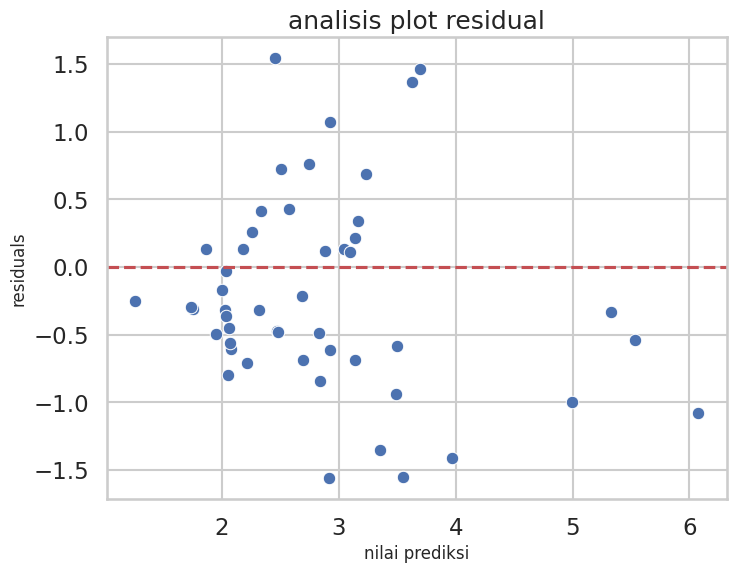

In [72]:
# membuat plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_pred['tip'], y=residuals['tip'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('analisis plot residual', fontsize=18)
plt.xlabel('nilai prediksi', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.show()

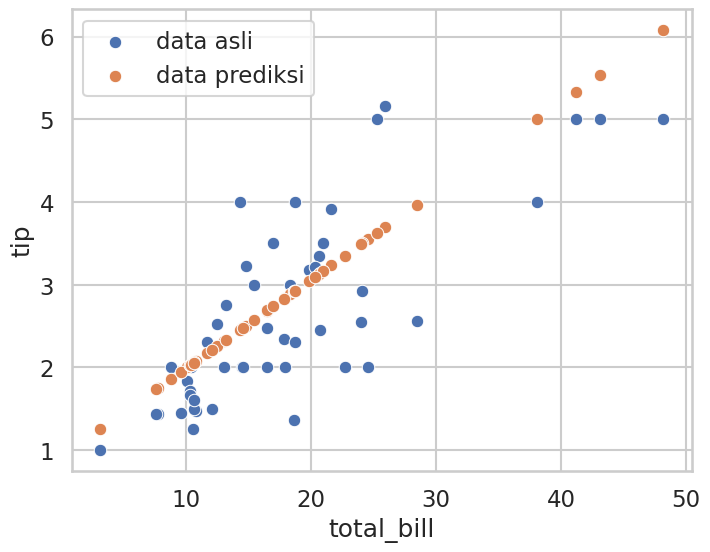

In [73]:
# membuat plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['total_bill'],y=Y_test['tip'],label='data asli')
sns.scatterplot(x=X_test['total_bill'],y=Y_pred['tip'],label='data prediksi')
plt.show()

---
### 5. Langkah 3: Sintesis dan Laporan Akhir

Sekarang, saatnya menggabungkan semua temuan kita ke dalam sebuah kesimpulan yang kohesif. Ini adalah bagian yang akan Anda sampaikan kepada tim atau pemangku kepentingan Anda.

#### **Laporan Evaluasi Model Prediksi Penjualan**

  1. ringkasan performa kuantitatif
* **Mean Absolute Error (MAE):0.6209** kesalahan prediksi tip meleset sekitar 0.62 unit dari nilai sebenarnya. nilai ini sedikit lebih rendah dari RMSE, yang mengindikasikan tidak ada banyak outlier / kesalahan yang ekstrem
* **Mean Squared Error (MSE):0.5688** 
* **Root Mean Squared Error (RMAE):0.7542** kesalahan prediksi sekitar 25% dari banyak tip. jika tip diukur dalam unit, maka prediksi tip memiliki kesalahan 0.25 unit 
* **R-Squared (R²):0.5449** berhasil menjelaskan bahwa sekitar 54.59% dari variasi dalam data bill dan tip pada set tip. ini menunjukkan bahwa total bill dan tip memiliki kekuatan prediktif yang tidak tinggi

  2. analisis performa kualitatif
* sebaran residual memiliki point cloud pada tip dibawah 4 dollar
* untuk rentang prediksi tip yang diberikan, residual memiliki nilai yang tidak banyak tersebar pada nilai prediksi tip yang tinggi. ini mengindikasikan bahwa tip pada nilai yang tinggi tidak banyak data tersedia